# Работа с датасетом о стоймости домов #

Ссылка на датасет: https://www.kaggle.com/shree1992/housedata

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv("./datasets/housedata/data.csv")

**Данные в датасете содержат следующие признаки:**

- date: дата объявления
- price: стоймость в долларах США (целевой признак)
- bedrooms: кол-во спален
- bathrooms: кол-во ванных
- sqft_living: жилая площадь (кв. фт.)
- sqft_lot: площадь участка (кв. фт.)
- floors: количество этажей
- waterfront: около водоема (0,1)
- view: количество сторон дома из которых хороший вид (от 0 до 4) 
- condition: состояние дома от 1(плохо) до 5(отлично)
- sqft_above: жилая площадь на первом этаже и ниже (кв. фт)
- sqft_basement: жилая площадь выше 1 этажа (кв. фт)
- yr_built: год постройки
- yr_renovated: год реновации
- street: улица
- city: город
- statezip: почтовый индекс
- country: страна

In [3]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
data.shape

(4600, 18)

## Подготовка данных ##

**Пропуски**<br>

In [5]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Как видно на всем датасете пропуков нет.

Проверим также что признак country несет в себе какой-то смысл

In [6]:
data.country.value_counts()

USA    4600
Name: country, dtype: int64

Данный признак содержит только одно значение, следовательно он бесполезен - удаляем его

In [19]:
data = data.drop(columns=['country'])

**Преобразование признаков типа object к числовым типам**<br>
Посмотрим типы у признаков

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
dtypes: float64(4), int64(9), object(4)
memory usage: 611

Приведем значение времени к формату **timestamp**

In [21]:
import time
import datetime

data.date = pd.Series([time.mktime(datetime.datetime.strptime(i, "%Y-%m-%d %H:%M:%S").timetuple()) for i in data.date])

Переведем остальные нечисловые признаки к целочисленному типу

In [22]:
from sklearn.preprocessing import LabelEncoder


for i in ["street", "city", "statezip"]:
    data[i]=LabelEncoder().fit_transform(data[i])

data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,1.398974e+09,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,62
1,1.398974e+09,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58
2,1.398974e+09,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26
3,1.398974e+09,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7
4,1.398974e+09,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,31


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   float64
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   int64  
 15  city           4600 non-null   int64  
 16  statezip       4600 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 611.1 KB


Из полученного можем видеть, что все категориальные признаки из строчных заменились на числовые 

## Визуализация данных ##

**Отобразим корреляцию признаков с помощью тепловой карты**<br>
Единственное уберем категориальные признаки, так как в данном случае они не несут никакого смысла

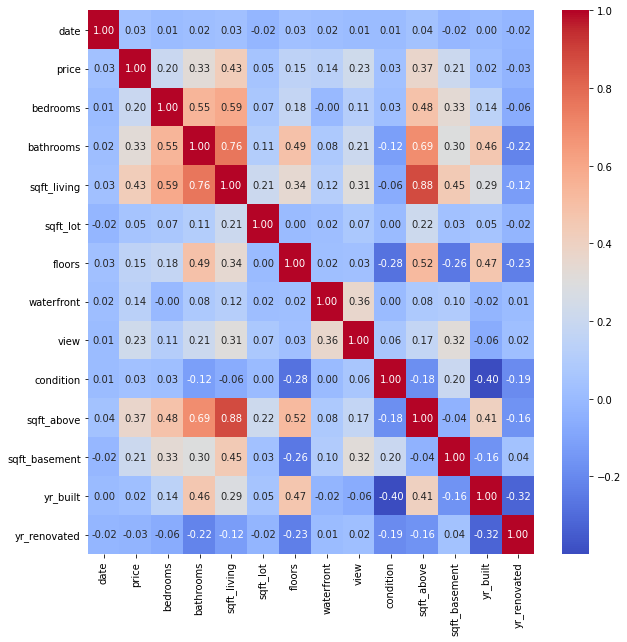

In [24]:
fig, ax = plt.subplots(figsize=(10,10)) 

features = list(data.columns).copy()

non_ordinal_attributes = ["street", "city", "statezip"]

for i in non_ordinal_attributes:
    features.remove(i)


sns.heatmap(data[features].corr(), annot=True, fmt=".2f", cmap= 'coolwarm');

Из построенной тепловой карты следует, что цена на дом неплохо коллерирует со следующими признаками:  bedrooms(коэффициент корреляции 0.20), bathrooms (0.33), sqft_living (0.43), floors (0.15), waterfront (0.14), view (0.23), sqft_above (0.37), sqft_basement(0.21).<br> Все это объективно важные параметры влияющие на итоговую цену дома. <br> Неожиданно, что цена на дом в данном датасете не зависит от даты объявления